## Wine Quality Classifier (Model Training and Experiment Tracking):
* [Model Training and Hyperparameter Tuning](#training)
* [Test Model Performance on 6 DataPoints](#model-performance)
* [Experiment Tracking & Model Registration](#experiment-tracking)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import mlflow

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

<a id="training"></a>
# Model Training and Hyperparameter Tuning

In [2]:
# Load training data and assign the X_train and y_train
train_df = pd.read_csv('training_data/train_dataset.csv')

X_train = train_df.drop(['best quality'], axis=1)
y_train = train_df['best quality']

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
train_df.head()


X_train.shape:  (3428, 11)
y_train.shape:  (3428,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,1
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,1
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,1
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,0
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,1


In [8]:
# Load testing data and assign the X_test and y_test
test_df = pd.read_csv('testing_data/test_dataset.csv')

X_test = test_df.drop(['best quality'], axis=1)
y_test = test_df['best quality']

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

test_df.head()

X_test.shape:  (1176, 11)
y_test.shape:  (1176,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,8.6,0.230,0.46,1.0,0.054,9.0,72.0,0.99410,2.95,0.49,9.1,1
1,6.0,0.180,0.27,1.5,0.089,40.0,143.0,0.99230,3.49,0.62,10.8,1
2,7.2,0.210,0.37,1.6,0.049,23.0,94.0,0.99240,3.16,0.48,10.9,1
3,6.1,0.255,0.44,12.3,0.045,53.0,197.0,0.99670,3.24,0.54,9.5,1
4,6.4,0.240,0.25,20.2,0.083,35.0,157.0,0.99976,3.17,0.50,9.1,0


In [4]:
# Model training for Logistic Regression
solver='liblinear'
class_weight='balanced'
model_logreg = LogisticRegression(solver=solver, multi_class ='auto', class_weight=class_weight)
model_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='auto',
                   solver='liblinear')

In [9]:
# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)

print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


Logistic Regression:
Training Accuracy: 0.7121
Validation Accuracy: 0.7168


In [10]:
# Validation
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 71.68%


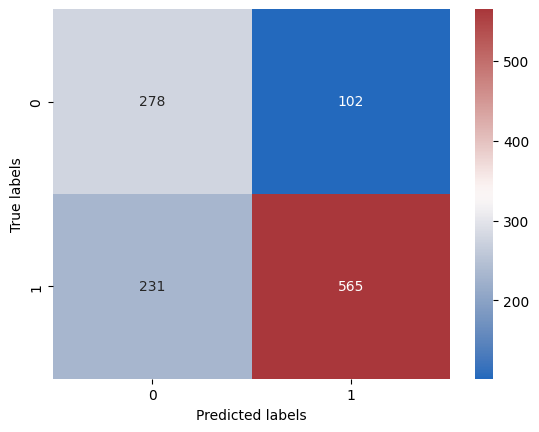

In [11]:
# Defining confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualizing confusion matrix

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [12]:
# Print the classification report for the best performing model.
print(metrics.classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       380
           1       0.85      0.71      0.77       796

    accuracy                           0.72      1176
   macro avg       0.70      0.72      0.70      1176
weighted avg       0.75      0.72      0.72      1176



<a id="model-performance"></a>
# Test Model Performance on 6 DataPoints

In [13]:
# Test Model Performance on 6 data points from testing_data/test_dataset.csvt
test_df_6 = test_df.head(6)

# Prepare the test input by dropping the 'best quality' columns
test_df_6_input = test_df_6.drop(['best quality'], axis=1)

# Extract the actual Wine Quality for the first 6 examples from test_dataset
actual_class_test = test_df_6['best quality']

# Use the trained model to predict the class for the test input
predicted_class_test = pd.DataFrame(model_logreg.predict(test_df_6_input), columns=['Predicted Wine Quality'])

# Combine predicted and actual classes into a single DataFrame
model_output = pd.concat([predicted_class_test, actual_class_test.reset_index(drop=True)], axis=1)

# Rename columns for clarity
model_output.columns = ['Predicted Wine Quality', 'Actual Wine Quality']

print(model_output)

   Predicted Wine Quality  Actual Wine Quality
0                       0                    1
1                       1                    1
2                       1                    1
3                       1                    1
4                       0                    0
5                       1                    1


##### The first part of the Hands-On Lab is now complete. 
##### After learning about the concepts of MLOps, we will continue with the rest of the notebook.

<a id="experiment-tracking"></a>
# Experiment Tracking & Model Registration

In [14]:
# Store Model and its dependencies on MLFlow
mlflow.set_tracking_uri(uri="http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/")
mlflow.set_experiment("test test test test")
with mlflow.start_run():
    
    # store model's parameters
    mlflow.log_param("solver", solver)
    mlflow.log_param("class_weight", class_weight)
    
    # store model's metrices
    mlflow.log_metric("Training Accuracy", training_accuracy)
    mlflow.log_metric("Validation Accuracy", val_accuracy)

    # store model
    mlflow.sklearn.log_model(
        sk_model=model_logreg,
        artifact_path="model_logreg",
        registered_model_name="ElasticnetWineModel",
    )

2025/01/28 14:55:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ElasticnetWineModel' already exists. Creating a new version of this model...
2025/01/28 14:55:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ElasticnetWineModel, version 3
Created version '3' of model 'ElasticnetWineModel'.


🏃 View run resilient-bat-103 at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/4/runs/6dd07dc23d9a412b95dd006a33eaf149
🧪 View experiment at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/4


IGNORE BELOW CELLs:

In [16]:
test_df_6_input.to_json(orient ='split')

'{"columns":["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],"index":[0,1,2,3,4,5],"data":[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]}'

In [17]:
test_df_6_input.to_json(orient ='values')

'[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]'